This notebook steps through merging or stacking ID strips images from the JWST guiders.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import os

plt.rcParams.update({'figure.dpi' : 100,
                     'image.origin' : 'lower',
                     'image.interpolation' : 'nearest',
                     'image.cmap' : 'Greys_r'})

%matplotlib inline

In [2]:
data_loc = '/user/kbrooks/FGS/Before_LOS_2/dhas'

In [3]:
id_strips_file = os.path.join(data_loc, 'Before_LOS_2_G1_IDstrips.fits')
id_strips_data = fits.getdata(id_strips_file)

We expect the strips data to be 36 strips of 64 x 2048 pixels. 

There is 8 row overlap between strips.

In [4]:
print(id_strips_data.shape)

(144, 64, 2048)


Take every 4th image since the read out is RESET READ READ RESET READ READ


In [5]:
read1 = id_strips_data[::4, :, :]
read2 = id_strips_data[1::4, :, :]
read3 = id_strips_data[2::4, :, :]
read4 = id_strips_data[3::4, :, :]

Plot the first strip!

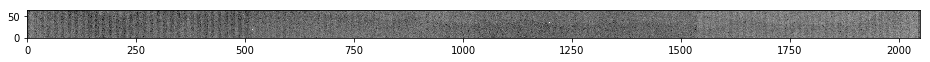

In [6]:
plt.figure(figsize=(16,8))
plt.imshow(read1[0], norm=LogNorm())
plt.show()

A couple convenience functions for creating stacked and merged ID images

In [7]:
def create_stacked_im(strips):
    fullframe_stacked = np.zeros((64*36, 2048))
    for i, strip in enumerate(strips):
        fullframe_stacked[i*64:i*64+64]=strip
        
    return fullframe_stacked

def create_merged_im(strips):
    fullframe_merged = np.zeros(((64-8)*35+64, 2048))
    for i, strip in enumerate(strips):
        if i == 0:
            fullframe_merged[:64] = strip
        else:
            fullframe_merged[i*56:(i*56)+56]=strip[8:]

    return fullframe_merged

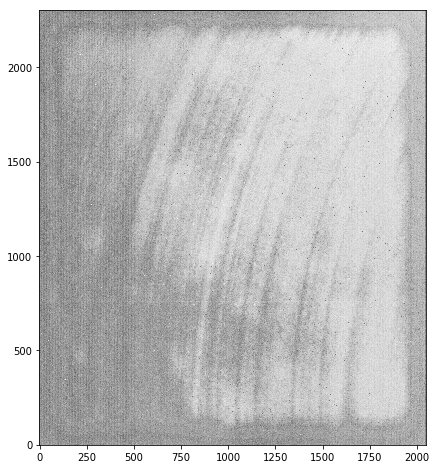

In [8]:
fullframe_stacked1 = create_stacked_im(read1)

plt.figure(figsize=(10,8))
plt.imshow(fullframe_stacked1, norm=LogNorm())
plt.show()

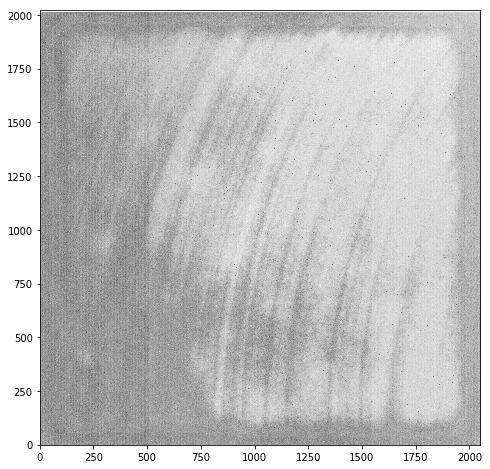

In [9]:
fullframe_merged1 = create_merged_im(read1)

plt.figure(figsize=(10,8))
plt.imshow(fullframe_merged1, norm=LogNorm())

## Read 2 

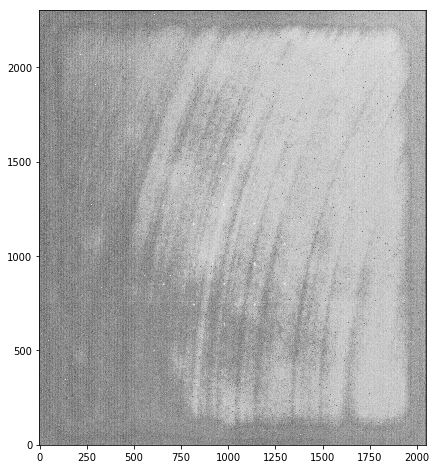

In [10]:
fullframe_stacked2 = create_stacked_im(read2)

plt.figure(figsize=(10,8))
plt.imshow(fullframe_stacked2, norm=LogNorm())

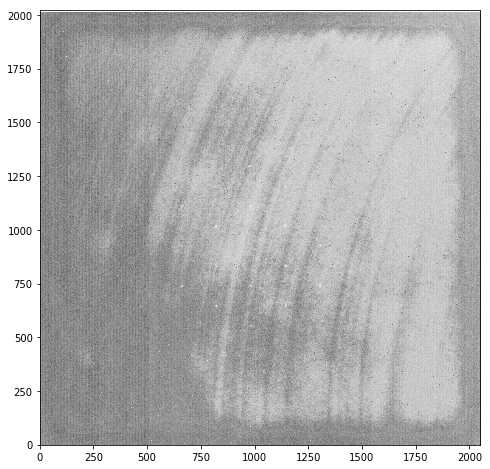

In [11]:
fullframe_merged2 = create_merged_im(read2)

plt.figure(figsize=(10,8))
plt.imshow(fullframe_merged2, norm=LogNorm())


### Subtract stacked1 from stacked2 to get funny CDS image

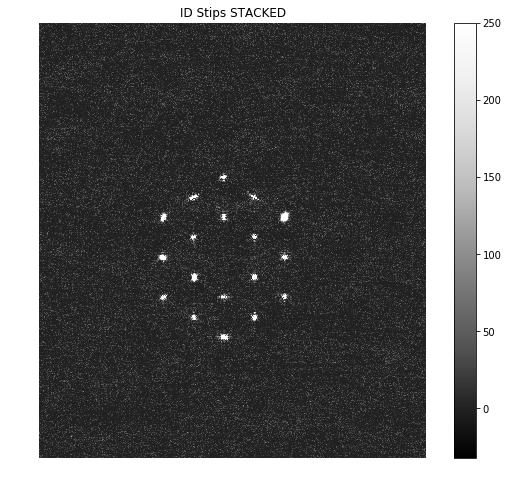

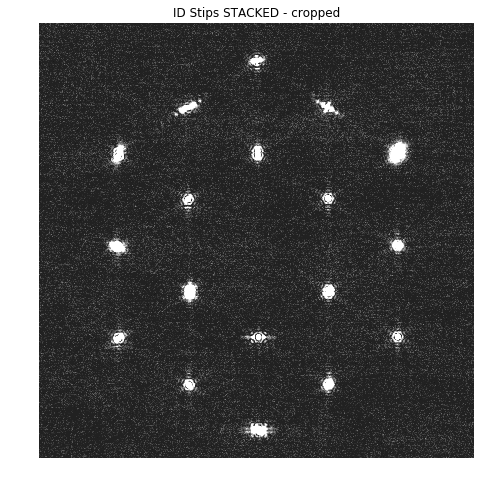

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(fullframe_stacked2 - fullframe_stacked1, vmax=250)
plt.axis('off')
plt.title('ID Stips STACKED')
plt.colorbar()
plt.show()


plt.figure(figsize=(10,8))
plt.imshow(fullframe_stacked2 - fullframe_stacked1, vmax=250)
plt.xlim(475, 1475)
plt.ylim(575, 1575)
plt.axis('off')
plt.title('ID Stips STACKED - cropped')
#plt.colorbar()
plt.show()

### Subtract merged1 from merged2 to get CDS image

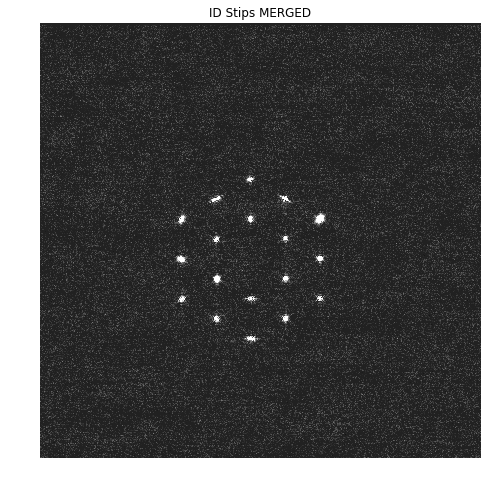

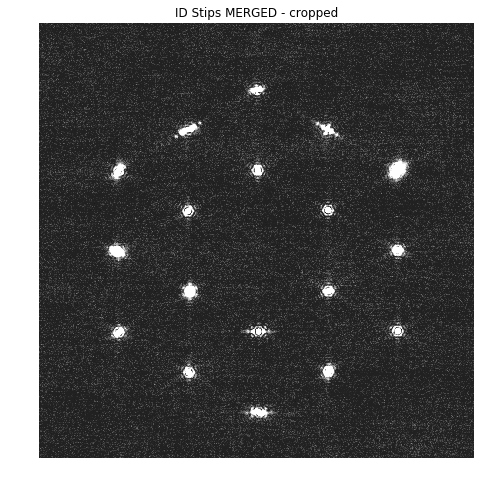

In [13]:
plt.figure(figsize=(10,8))
plt.imshow(fullframe_merged2 - fullframe_merged1, vmax=250)
plt.axis('off')
plt.title('ID Stips MERGED')
plt.show()


plt.figure(figsize=(10,8))
plt.imshow(fullframe_merged2 - fullframe_merged1, vmax=250)
plt.xlim(475, 1475)
plt.ylim(450, 1450)
plt.axis('off')
plt.title('ID Stips MERGED - cropped')
#plt.colorbar()
plt.show()

## Get ACQ1 data 

In [14]:
acq1_file = os.path.join(data_loc, 'Before_LOS_2_G1_ACQ1.fits')
acq1_data = fits.getdata(acq1_file)

acq2_file = os.path.join(data_loc, 'Before_LOS_2_G1_ACQ2.fits')
acq2_data = fits.getdata(acq2_file)

In [15]:
print(acq1_data.shape)

(12, 128, 128)


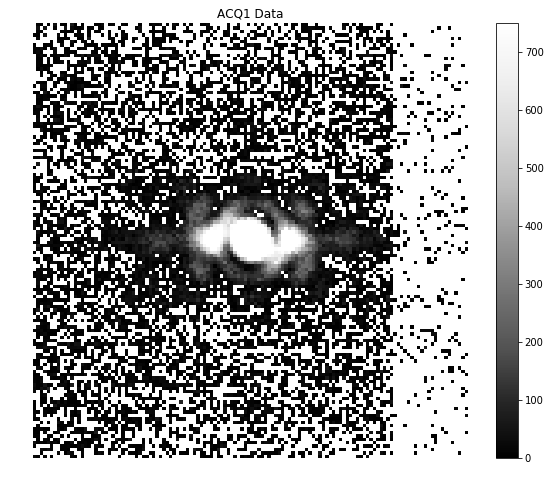

In [16]:
plt.figure(figsize=(10,8))
plt.imshow(acq1_data[1] - acq1_data[2], vmax=750)
plt.axis('off')
plt.title('ACQ1 Data')
plt.colorbar()
plt.show()


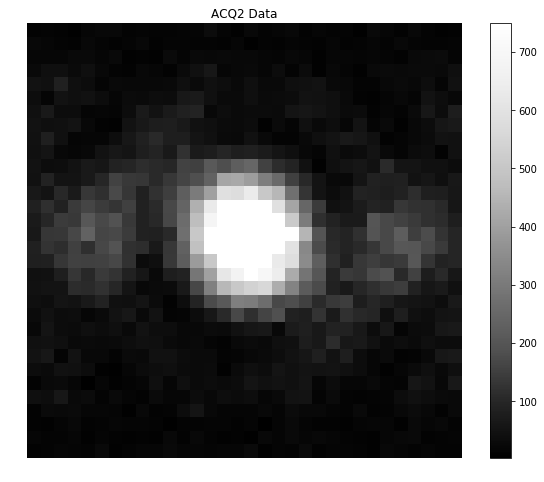

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(acq2_data[1] - acq2_data[2], vmax=750)
plt.axis('off')
plt.title('ACQ2 Data')
plt.colorbar()
plt.show()

#### Last Updated 

Date: 1 July, 2019

Author(s): Keira Brooks